# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [23]:
import json

# Fetch current BTC price
btc_response = requests.get(btc_url + "?format=json")

btc_data = btc_response.json()

btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url + "?format=json")

eth_data = eth_response.json()

eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35880.00
The current value of your 5.3 ETH is $9429.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [49]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [29]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2")

In [40]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop(columns="symbol")
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop(columns="symbol")

# Concatenate the ticker DataFrames
reorganized_df = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
reorganized_df

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-06-09 04:00:00+00:00  102.07  102.22  101.97  102.05  5420518   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-09 04:00:00+00:00       17714  102.086353  409.36  411.74  401.44   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-09 04:00:00+00:00  401.44  85991523      577695  406.846494

In [52]:
# Pick AGG and SPY close prices
agg_close_price = float(reorganized_df["AGG"]["close"])
spy_close_price = float(reorganized_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.05
Current SPY closing price: $401.44


In [53]:
# Compute the current value of shares
my_spy_value = agg_close_price * my_agg
my_agg_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20410.00
The current value of your 200 AGG shares is $20072.00


### Savings Health Analysis

In [60]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
total_shares_value = my_spy_value + my_agg_value
total_crypto_value = my_btc_value + my_eth_value

df_savings = pd.DataFrame(
    {"Asset" : ["Crypto", "Stock"],
     "Amount" : [total_crypto_value, total_shares_value]})

# Create savings DataFrame
df_savings.set_index("Asset", inplace=True)

# Display savings DataFrame
display(df_savings)

,Amount
Asset,
Crypto,45309.336
Stock,40482.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

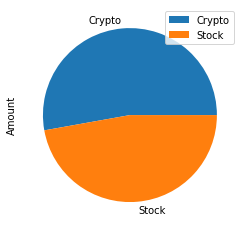

In [61]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [66]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_shares_value + total_crypto_value
deficit = round((total_savings - emergency_fund), 2)

# Validate saving health
if emergency_fund > total_savings:
    print("Congarulations, you have enough money in your fund!")
elif emergency_fund == total_savings:
    print("Congarulations, you have reached your savings goal!")
elif emergency_fund < total_savings:
    print(f"Keep saving, your are ${deficit} away from reaching your goal!")

Keep saving, your are $49791.34 away from reaching your goal!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [67]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [70]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df


df_stock_data
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop(columns="symbol")
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop(columns="symbol")

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])


# Display sample data
df_stock_data

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   
...                           ...       ...       ...     ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.3700  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.4100   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.2800   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.4200   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.4700   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.8800   
...                               ...         ...     ...     ...       ...   
2021-04-26 04:00:00+00:00       13521  114.706244  417.42  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.97  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.84  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.38  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.67  418.54  416.3400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074  
...                           ...        ...         ...         ...  
2021-04-26 04:00:00+00:00  417.61   52076360      295872  417.505200  
2021-04-27 04:00:00+00:00  417.52   50324187      296302  417.481280  
2021-04-28 04:00:00+00:00  417.40   50692843      330050  417.742098  
2021-04-29 04:00:00+00:00  420.06   77056617      443399  418.825111  
2021-04-30 04:00:00+00:00  417.30   84731942      478844  417.651995  

[1259 rows x 14 columns]

In [74]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [75]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [76]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hakobkeymetlyan/Rutgers/homework/api_homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986711,0.997635,1.002880,1.006184,1.000880,1.006082,1.010866,0.995905,1.007471,1.004911,...,0.999691,1.000231,1.003178,0.999495,0.999177,0.993815,0.994551,0.998363,1.001231,0.998476
2,0.980750,0.991809,1.010982,1.009486,0.996999,1.010615,1.019182,0.989703,1.014163,1.010179,...,1.009920,1.005066,1.005079,1.012616,1.002084,0.986507,1.002768,0.996574,0.994345,0.998728
3,0.984001,1.006774,1.012181,1.016846,1.006615,1.010623,1.024850,0.993128,1.008005,1.013867,...,1.016630,1.003705,1.016207,1.020488,1.003656,0.975392,1.004592,0.999031,0.993819,0.998589
4,0.989334,1.000591,1.019549,1.019577,1.001299,1.025459,1.025411,0.992308,1.009452,1.024809,...,1.016545,1.003744,1.012124,1.012254,1.012191,0.986594,0.986968,0.991254,0.988193,1.000755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.384536,3.219313,2.713324,3.594104,9.076411,7.852565,12.537760,14.551666,8.245570,7.339306,...,6.974321,6.219836,6.627852,27.245571,10.021368,6.966723,8.834250,8.281691,9.231162,8.966596
7557,13.328625,3.218573,2.709992,3.584332,9.098990,7.812545,12.391763,14.544372,8.205389,7.402986,...,6.977350,6.241127,6.633243,27.446291,9.968294,7.079214,8.833877,8.307963,9.182885,8.916670
7558,13.359743,3.176831,2.719768,3.590778,9.088726,7.853275,12.389104,14.628662,8.202197,7.474364,...,6.978039,6.231847,6.600755,27.222908,10.100029,7.078351,8.789712,8.369978,9.137454,8.932204
7559,13.342847,3.168787,2.744533,3.559510,9.096771,7.908940,12.362819,14.592417,8.190105,7.478934,...,7.024152,6.198902,6.677918,27.345706,10.102195,7.135873,8.753009,8.332473,9.182292,8.980845


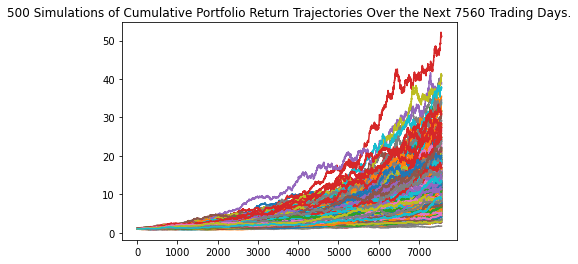

In [77]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

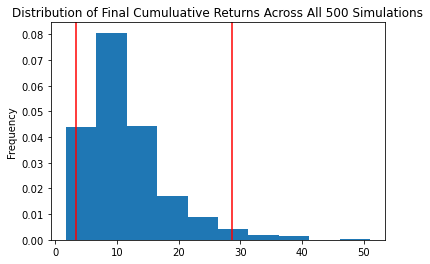

In [78]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.476216
std               6.649383
min               1.703818
25%               7.078568
50%               9.846449
75%              14.022549
max              51.064914
95% CI Lower      3.298830
95% CI Upper     28.708282
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [80]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((tbl[8]*initial_investment),2)
ci_upper = round((tbl[9]*initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65976.6 and $574165.63


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [81]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((tbl[8]*initial_investment),2)
ci_upper = round((tbl[9]*initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $98964.9 and $861248.45


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")